In [1]:
import numpy as np
from scipy.optimize import curve_fit, root
import WrightTools as wt
import matplotlib.pyplot as plt
from scipy import signal as s
from scipy.stats import norm
from scipy.special import erfc, erf
from scipy.signal import find_peaks, peak_widths
import math


def gauss_curve(x, x0, a, sigma):
    return a * np.exp(-(x-x0)**2/(2*sigma**2))

def skew2(x, sigmag, mu, alpha, c, a):
    normpdf = (1 / (sigmag * np.sqrt(2 * math.pi))) * np.exp(-(np.power((x - mu), 2) / (2 * np.power(sigmag, 2))))
    normcdf = (0.5 * (1 + erf((alpha * ((x - mu) / sigmag)) / (np.sqrt(2)))))
    return 2 * a * normpdf * normcdf + c#, max(normpdf)

def skew(x, mu, a, sigmag, alpha, c):
    return skew2(x, sigmag, mu, alpha, c, a)#[0]




C:\Users\Peter\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Peter\miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Peter\miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


[]

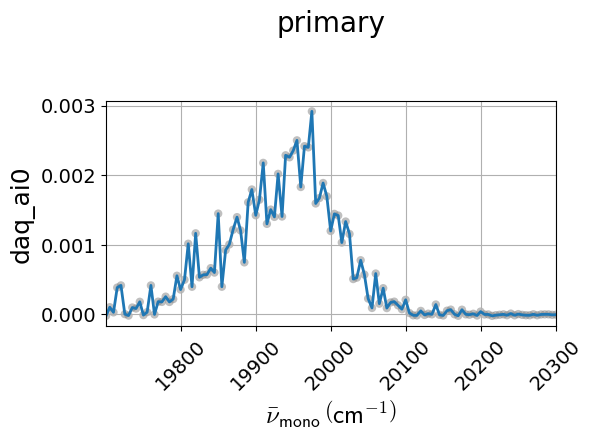

In [29]:
fn1 = 'C:\\Users\\Peter\\Documents\\Broadband Sample Output Waldo\\2023-06-05 47793 grid_scan_wp mono rdc broadband resonant scan off delays dd3163af'+'\\primary.wt5'
data1 = wt.open(fn1)
#data1.print_tree()
wt.artists.quick1D(data1, 'mono')

19933.548898273435 71.49364747446292 0.028039562671215504


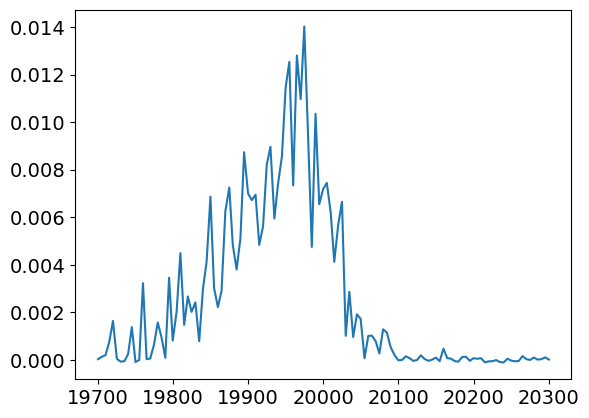

In [22]:
x1 = data1.axes[0].full
y1 = data1.channels[8].full
mean = np.average(x1, weights=y1)
sigma = np.sqrt(sum(y1 * (x1 - mean)**2) / sum(y1))
test_amp = 2*max(y1)
print(mean, sigma, test_amp)
plt.plot(x1, y1)

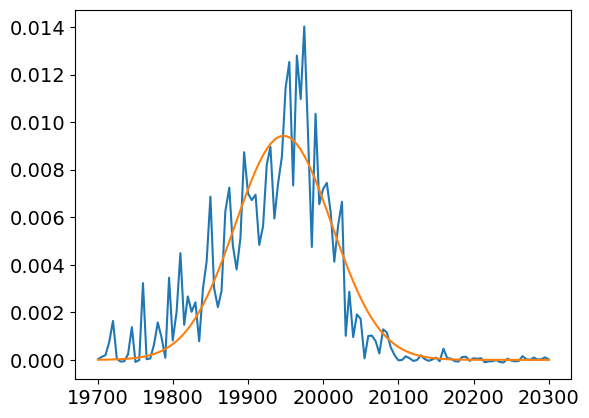

In [23]:
fit1 = curve_fit(gauss_curve, x1, y1, p0=(mean, test_amp, sigma))
plt.plot(x1, y1)
plt.plot(x1, [gauss_curve(i, *fit1[0]) for i in x1])

[ 2.00128639e+04  1.48624555e+00  1.04989810e+02 -3.73871593e+00
  1.29898684e-04]


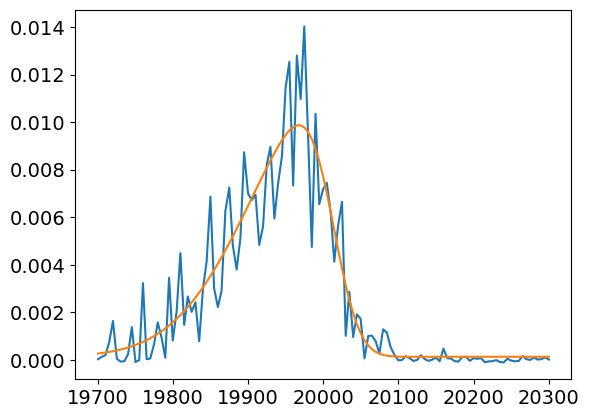

In [24]:
fit2 = curve_fit(skew, x1, y1, p0=(mean, test_amp, sigma, -0.1, 0.0001))
print(fit2[0])
plt.plot(x1, y1)
plt.plot(x1, [skew(i,*fit2[0]) for i in x1])

[27.95362648] [0.00506341] [56.51350355] [84.46713003] [138.51918577]


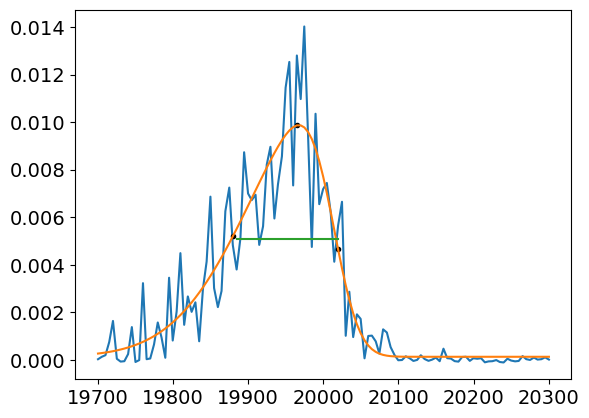

In [28]:
peak, _ = find_peaks([skew(i,*fit2[0]) for i in x1])
width, _, left, right = peak_widths([skew(i,*fit2[0]) for i in x1], peak, rel_height=0.5)
plt.plot(x1, y1)
plt.plot(x1[int(peak)], [skew(i,*fit2[0]) for i in x1][int(peak)], 'k.')
plt.plot(x1[int(left)], [skew(i,*fit2[0]) for i in x1][int(left)], 'k.')
plt.plot(x1[int(right)], [skew(i,*fit2[0]) for i in x1][int(right)], 'k.')
plt.plot(x1, [skew(i,*fit2[0]) for i in x1])
plt.plot(x1[int(left):int(right)], [0.00506341 for i in x1[int(left):int(right)]])
print(width, _, left, right, (right-left)/len(x1)*(max(x1)-min(x1))) 